# Data Wrangling Python

## Cara Membaca Data Menggunakan Pandas

### Membaca file dengan menggunakan pandas

In [ ]:
import pandas as pd
csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

print(csv_data)

### Membaca file dengan menggunakan head()

In [ ]:
import pandas as pd
csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")
print(csv_data.head())

### Melakukan akses data kolom

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

print(csv_data["Age"])

### Melakukan akses data melalui baris

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

print(csv_data.iloc[5])

### Menampilkan suatu data dari baris dan kolom tertentu

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

print(csv_data["Age"].iloc[1])
print("Cuplikan Dataset: ")
print(csv_data.head())

### Menampilkan data dalam range tertentu

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

print("Menampilkan data ke 5 sampai kurang dari 10 dalam satu baris:")

print(csv_data.iloc[5:10])

### Menampilkan informasi statistik dengan Numpy

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

print(csv_data.describe(exclude="O"))

## Data Missing Hingga Normalisasi Data

### Handling Missing Value

Pada suatu dataset, ada kalanya data yang kita akan kita kelola tidak lengkap. Hal ini tentunya akan menyulitkan atau membuat hasil analisa tidak akurat. Penanggulangan akan data yang hilang ini biasa disebut Handling Missing Value. Penanganan dari nilai yang kosong ini banyak caranya. Sebagai seorang data science yang berhubungan dengan data yang real, solusi pertama yang benar-benar kita anjurkan untuk kasus seperti ini adalah melakukan trace kembali ke sumber data atau memerika ulang record. Terutama jika data itu berasal dari human record. Sangat disarankan untuk menelusuri kembali agar tidak terjadi kesalahan ketika sudah mencapai titik analisa. Selain solusi untuk melakukan penelusuran kembali ke sumberdata, pada ilmu data science juga ada beberapa metode yang bisa dijadikan solusi untuk menangani kasus ini.

### Melakukan pengecekan untuk nilai NULL yang ada

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data_missingvalue.csv")

print(csv_data.isnull().values.any())

### Solusi mengisi Missing Value
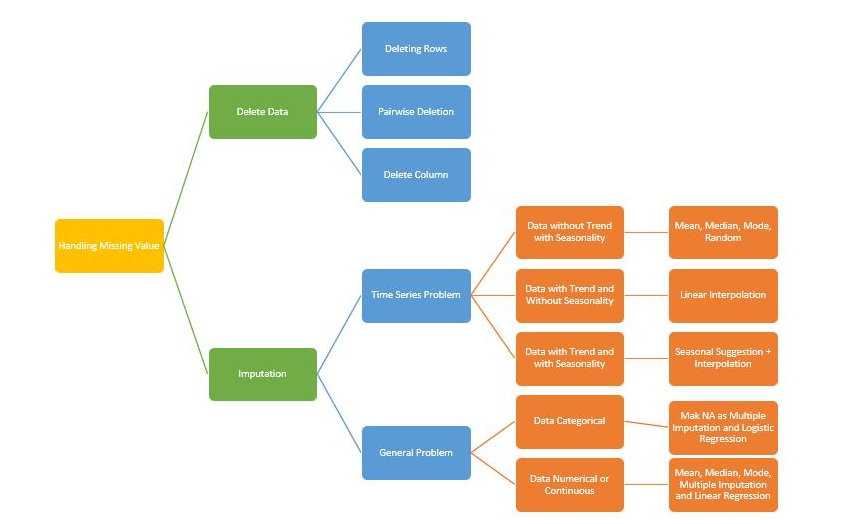

Dalam diagram diatas, perlu diketahui bahwa kasus kehilangan data bisa diatasi dengan berbagai cara. Bahkan, melakukan penghapusan data juga merupakan solusi yang bisa menjadi pilihan apabila jika dirasa mengisi nilai kosong akan memberikan pengaruh yang kurang bagus terhadap analisa, atau apabila pertimbangan data yang dihapus atau data yang hilang sedikit dan tidak memberikan terlalu banyak sumbangsih untuk analisa yang akan dilakukan. Penghapusan data bisa langsung pada baris data tersebut atau langsung satu kolom data.

Pada solusi kedua yaitu menggunakan imputation (pengisian data yang kosong) bisa tergantung dari permasalahannya. Khusus untuk masalah yang berhubungan forecasting atau peramalan tergantung dari data yang ada (lebih lengkap bisa dilihat pada gambar). Khusus untuk general problem tergantung jenis datanya. Jika yang hilang data kategorikal atau bersifat string bisa menggunakna relasi antar kolom dengan Logistic Regression, jika numerical bisa menggunakan statistik sederhana dan linear regression. Pada sesi kali ini kita akan mencoba menangani data hilang dengan statistik sederhana, Mean dan Median.

### Mengisi dengan Mean

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data_missingvalue.csv")
print(csv_data.mean())
print("Dataset yang masih terdapat nilai kosong ! :")
print(csv_data.head(10))

csv_data = csv_data.fillna(csv_data.mean())
print("Dataset yang sudah diproses Handling Missing Values dengan Mean :")
print(csv_data.head(10))

### Mengisi dengan Median

In [ ]:
import pandas as pd

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data_missingvalue.csv")
print("Dataset yang masih terdapat nilai kosong ! :")
print(csv_data.head(10))

csv_data = csv_data.fillna(csv_data.median())
print("Dataset yang sudah diproses Handling Missing Values dengan Median :")
print(csv_data.head(10))

### Normalisasi Data
Terkadang pada beberapa kasus, 1 kolom dengan kolom yang lain memiliki skala yang berbeda. Seperti cuplikan gambar di bawah ini :


|no   |usia   |masa kerja   | gaji  |
|-------|---|---|---|
| 1  | 50  |  30 | 10000000  |
|  2 | 30  | 10  | 5000000  |

Antara Usia dan Masa Kerja masih memiliki range yang sama dalam skala puluhan. Namun, jika kolom Usia dan Masa Kerja dibandingkan dengan Gaji memiliki range nilai yang berbeda, dimana Usia dan Masa Kerja memiliki range puluhan dan Gaji mempunyai range nilai jutaan. Memang terlihat sederhana, namun hal ini bisa menjadi masalah besar dalam contoh kasus klasterisasi atau klasifikasi. Masuk pada kasus K-means yang sudah pernah dibahas sebelumnya. K-means merupakan algoritma klasterisasi (clustering) yang menggunakan perhitungan jarak dalam prosesnya. Sekarang coba bayangkan :

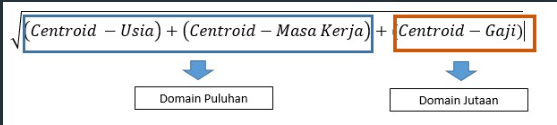

Jika tidak ada normalisasi, maka jelas perhitungan kmeans diatas akan tergantung pada Gaji. Kenapa? Karena gaji berdomain jutaan dan 2 kolom lainnya hanya berdomain puluhan. Berapapun usia dan masa kerja seseorang tidak akan berpengaruh terhadap penilaian suatu perusahaan. Perbedaan skala pada setiap kolom ini merupakan hal yang sangat wajar dan sering terjadi dan inilah pentingnya normalisasi. Normalisasi sangat penting, terutama untuk yang menggunakan perhitungan jarak dengan menggunakan metode apapun.

### Metode Normalisasi

1. **MinMax**
Metode Min-Max merupakan metode yang cukup bisa dibayangkan karena termasuk metode normalisasi yang bersifat linier dengan data aslinya. Namun, metode ini bisa menyebabkan out of bound pada beberapa kasus.

2. **Z-Score**
Zscore adalah metode yang sering digunakan dalam berbagai penelitian berbasis data mining atau data science. Z-score merupakan metode normalisasi yang berdasarkan mean (nilai rata-rata) dan standard deviation (deviasi standar) dari data. 

3. **Decimal Scaling**

4. **Softmax**
Softmax merupakan metode normalisasi pengembangan transformasi secara linier. Output range-nya adalah 0-1. Metode ini sangat berguna pada saat data yang ada melibatkan data outlier.

5. **Sigmoid**
Sigmoidal merupakan metode normalization melakukan normalisasi data secara nonlinier ke dalam range -1 s/d 1 dengan menggunakan fungsi sigmoid. Metode ini sangat berguna pada saat data yang ada melibatkan data outlier. Data outlier adalah data yang keluar jauh dari jangkauan data lainnya

### Praktek Normalisasi menggunakan Scikit Learn pada Python

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

csv_data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/shopping_data.csv")

array = csv_data.values

X = array[:,2:5] #memisahkan fitur dari dataset.
Y = array[:,0:1] #memisahkan class dari dataset.

dataset = pd.DataFrame({"Customer ID":array[:,0], "Gender":array[:,1], "Age":array[:,2], "Income":array[:,3], "Spending Score":array[:,4]})
print("dataset sebelum dinormalisasi :")
print(dataset.head(10))

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) #inisialisasi normalisasi MinMax
data = min_max_scaler.fit_transform(X) #transformasi MinMax untuk fitur
dataset = pd.DataFrame({"Age":data[:,0], "Income":data[:,1], "Spending Score":data[:,2], "Customer ID":array[:,0],"Gender":array[:,1]})
print("dataset setelah dinormalisasi :")
print(dataset.head(10))